# 📘 Gradient & Computation Graph Tutorial

---

### 🎯 The rate of change
Before using PyTorch to compute gradients automatically, we must understand the **mathematical foundation**.  
The gradient is simply the **rate of change**, and it comes from the definition of the **derivative**.

---

## The true definition of derivative

For a function f(x), the derivative at a point \( x \) is defined as:

$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$

👉 This measures the slope of the tangent line to \( f(x) \) at point \( x \).

---

### Example: $ f(x) = x^2 $

Using the definition:

$
f'(x) = \lim_{h \to 0} \frac{(x+h)^2 - x^2}{h}
$

$
= \lim_{h \to 0} \frac{x^2 + 2xh + h^2 - x^2}{h}
$

$
= \lim_{h \to 0} \frac{2xh + h^2}{h}
= \lim_{h \to 0} (2x + h)
= 2x
$

So:

$
f'(x) = 2x
$

At \( x = 3 \):

$
f'(3) = 6
$

---

## Newton’s notation

We can write the derivative as $ y' $.  
For $y = x^2$:  

$
y' = 2x
$

---

## Leibniz notation

We can also write:

$
\frac{dy}{dx} = 2x
$

👉 Both notations mean the same thing. Leibniz emphasizes “change in $y$ per change in $x$”.

---

## Why this matters in ML?

- Derivatives tell us **how sensitive the output is to a small change in the input**.  
- In machine learning:
  - Input = model parameters (weights, bias).  
  - Output = loss function.  
- Gradient = tells us **which direction to adjust parameters to reduce loss**.

👉 Gradient descent = follow the slope downhill.


In [6]:
# Demonstrating derivative using the definition with limit

def f(x):
    return x**2   # function f(x) = x^2

def derivative_limit(f, x, h=1e-6):
    return (f(x + h) - f(x)) / h   # finite difference approximation

# Pick a point
x0 = 3
approx = derivative_limit(f, x0)
exact = 2 * x0   # we know derivative is 2x

print(f"Function: f(x) = x^2")
print(f"Point: x = {x0}")
print(f"Derivative (limit approximation) = {approx}")
print(f"Derivative (exact formula)       = {exact}")


Function: f(x) = x^2
Point: x = 3
Derivative (limit approximation) = 6.000001000927568
Derivative (exact formula)       = 6


## 1) From Derivative to Gradient

So far, we looked at the **derivative** of a function with a single input variable:

$
f(x) = x^2, \quad f'(x) = \frac{dy}{dx} = 2x
$

👉 The derivative tells us **how fast the function changes with respect to one variable**.

---

### What if we have more than one variable?

In machine learning, loss functions usually depend on **many parameters** (weights, biases).  
For example:

$
y = (x_1 + x_2) \cdot x_3
$

Now, we can’t just ask “what is the slope?” — because there are multiple directions to move.  
Instead, we compute **partial derivatives**:

$
\frac{\partial y}{\partial x_1} = x_3, \quad
\frac{\partial y}{\partial x_2} = x_3, \quad
\frac{\partial y}{\partial x_3} = (x_1 + x_2)
$

---

### The Gradient

The collection of all partial derivatives is called the **gradient**:

$
\nabla y = 
\begin{bmatrix}
\frac{\partial y}{\partial x_1} \\
\frac{\partial y}{\partial x_2} \\
\frac{\partial y}{\partial x_3}
\end{bmatrix}
$

👉 The gradient is a **vector** that points in the direction of the steepest increase of the function.  

In machine learning, we use the **negative gradient** (steepest descent) to update parameters and reduce loss.

---

### Intuition

- **Derivative** = slope in 1D.  
- **Gradient** = slope vector in multi-dimensional space.  

This is why PyTorch computes gradients for every parameter at once — so we can update all weights together during training.


# 📘 Gradient & Computation Graph Tutorial

---

### 🎯 Why this tutorial matters
- Every deep learning model is trained with **gradient descent**.  
- Gradients are computed automatically by **backpropagation**.  
- Backprop relies on a **computation graph** (a directed acyclic graph of operations).  

👉 In this tutorial, we will:
1. Compute gradients with PyTorch.  
2. Visualize the computation graph with `graphviz.Digraph`.  
3. See *why* backprop works step by step.


In [1]:
import torch
from graphviz import Digraph


## 1) Why do we need gradients?

- Training = finding the best parameters (weights, bias).  
- We measure error using a **loss function**.  
- Gradients tell us:
  - Which direction to move parameters.  
  - How big the change should be.  

👉 Without gradients, we cannot update weights automatically.


In [2]:
# Example: simple function y = (x1 + x2) * x3
x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(3.0, requires_grad=True)
x3 = torch.tensor(4.0, requires_grad=True)

y = (x1 + x2) * x3
print("Output y =", y.item())


Output y = 20.0


## 2) Backpropagation in action


In [3]:
y.backward()

print("dy/dx1 =", x1.grad.item())
print("dy/dx2 =", x2.grad.item())
print("dy/dx3 =", x3.grad.item())


dy/dx1 = 4.0
dy/dx2 = 4.0
dy/dx3 = 5.0


### WHY these values?

Function:  
$
y = (x_1 + x_2) \cdot x_3
$

Derivatives:  
- dy/dx1 = x3 = 4  
- dy/dx2 = x3 = 4  
- dy/dx3 = (x1 + x2) = 5  

👉 PyTorch gives the same result!


## 3) Drawing the Computation Graph

We’ll use `graphviz.Digraph` to visualize how `y` is built from inputs.  


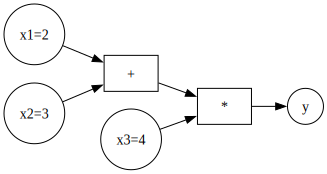

In [4]:
dot = Digraph(format="png", graph_attr={"rankdir": "LR"})
def draw_graph():
    

    # Nodes
    dot.node("x1", "x1=2", shape="circle")
    dot.node("x2", "x2=3", shape="circle")
    dot.node("x3", "x3=4", shape="circle")
    dot.node("add", "+", shape="box")
    dot.node("mul", "*", shape="box")
    dot.node("y", "y", shape="circle")

    # Edges
    dot.edge("x1", "add")
    dot.edge("x2", "add")
    dot.edge("add", "mul")
    dot.edge("x3", "mul")
    dot.edge("mul", "y")

    return dot

dot = draw_graph()
dot


## ✅ Summary

- Gradients = how parameters should change to reduce loss.  
- Computation graph = roadmap of operations for backprop.  
- PyTorch builds this graph dynamically → no need to do calculus manually.  
- Deep learning = giant computation graphs with millions of nodes.  

